# Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read dataset

In [2]:
df_train = pd.read_csv('./train.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# EDA

## Missing Data

In [5]:
col_missing_data = df_train.columns[df_train.isnull().sum() > 0].tolist()
col_missing_data

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

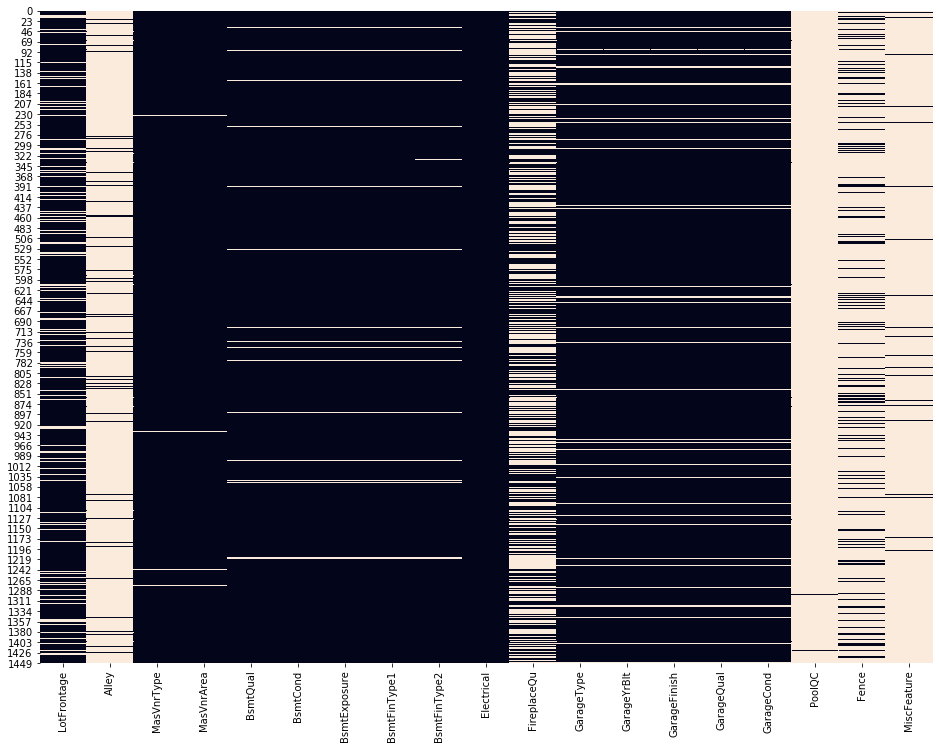

In [6]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train[col_missing_data].isnull(), cbar=False)

In [7]:
df_train['FireplaceQu'].isnull().sum()/df_train.count().max()

0.4726027397260274

In [8]:
df_train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], inplace=True)

In [10]:
col_missing_data = df_train.columns[df_train.isnull().sum() > 0].tolist()
df_train[col_missing_data].head(20)

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
5,85.0,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,1993.0,Unf,TA,TA
6,75.0,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Attchd,2004.0,RFn,TA,TA
7,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,Attchd,1973.0,RFn,TA,TA
8,51.0,None,0.0,TA,TA,No,Unf,Unf,FuseF,Detchd,1931.0,Unf,Fa,TA
9,50.0,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,Attchd,1939.0,RFn,Gd,TA


## Strategy For missing data

In [ ]:
#MEAN MODE MEDIUM

In [ ]:
#Encode categorical data
categoricals = df_train.select_dtypes(exclude=np.number).columns.tolist()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for categorical in categoricals:
    df_train.loc[:,categorical] = label_encoder.fit_transform(df_train.loc[:,categorical].astype('str')).astype('float64')

In [ ]:
df_train.select_dtypes(exclude=np.number).columns.tolist()

In [ ]:
df_train[categoricals].head()

In [ ]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train.corr(), cmap = 'OrRd');

In [ ]:
df_train.corr()['SalePrice'].sort_values(ascending = False)

In [ ]:
#Start with Weak Positive Correlation
corr = df_train.corr()['SalePrice'][abs(df_train.corr()['SalePrice']) > 0.5].sort_values(ascending = False)
corr

In [ ]:
#Closer Look with values that correlate with saleprice.

In [ ]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train[corr.index].corr(), cbar=True, annot=True, cmap=sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light"));

In [ ]:
# Strong Correlation values between predictor variable!
# GarageCars & GarageArea. Increase In Area of Garage -> Increase in number Cars
# TotRmsAbvGrd & GrLivArea. Total rooms above grade (does not include bathrooms) & Above grade (ground) living area square feet
# 1stFlrSF & TotalBsmtSF. First Floor square feet & Total square feet of basement area

In [ ]:
# REMOVE FEATURE
# 1) Garage Area - People dont think about how many Msq when viewing the garage. They estimate how many cars can fit into the garage

In [ ]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train[corr.index].isnull(), cmap = 'Greys');

In [ ]:
df_train['SalePrice'].describe()

In [ ]:
sns.set(style="whitegrid",)
plt.figure(figsize=(16, 6))
ax = sns.boxplot(y=df_train["SalePrice"])

In [ ]:
sns.distplot(df_train["SalePrice"],fit=norm)

In [ ]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())
# Positive skew https://becominghuman.ai/how-to-deal-with-skewed-dataset-in-machine-learning-afd2928011cc


In [ ]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [ ]:
sns.distplot(df_train["SalePrice"],fit=norm)

In [ ]:
sns.boxplot(x='SalePrice', y=corr.index, data=df_train)

In [ ]:
sns.pairplot(data = df_train[cor.index])